In [48]:
import sklearn
print(sklearn.__version__)

1.5.2


In [49]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ЗАВДАННЯ № 1


Для кожного з них датасету застосуйте алгоритм K-means для кластеризації.
Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.



In [50]:

path_file = '/content/drive/MyDrive/Colab Notebooks/Colab/HW9/data_2d.csv'
df_data = pd.read_csv(path_file, header=None)

df_data

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


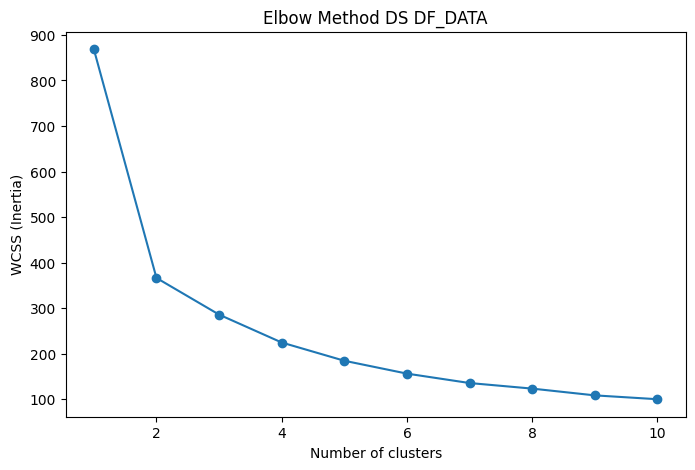

In [86]:
wcss_data = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_data)
    wcss_data.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss_data, marker='o')
plt.title('Elbow Method DS DF_DATA')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()


In [56]:
path_file2 = '/content/drive/MyDrive/Colab Notebooks/Colab/HW9/mnist.csv'
df_mnist = pd.read_csv(path_file2, header= None)

df_mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


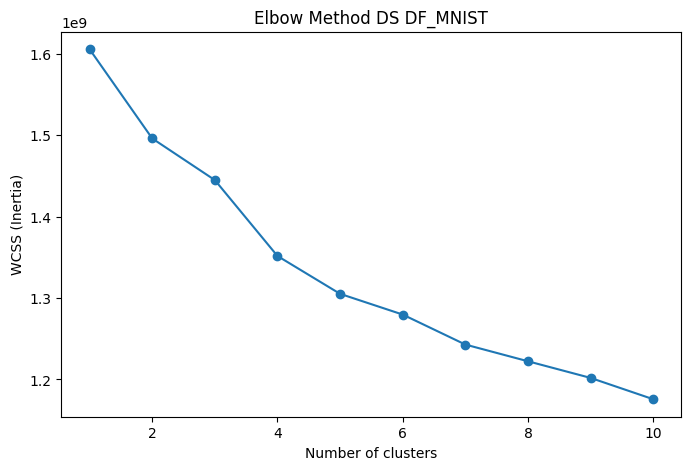

In [91]:
wcss_mnist = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df_mnist)
  wcss_mnist.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss_mnist, marker='o')
plt.title('Elbow Method DS DF_MNIST')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

Перший графік Elbow Method DS DF_DATA, показує кращу оптимальну кількість кластерів - 2

# ЗАВДАННЯ № 2

Візуалізуйте результат роботи кластеризації.

Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.



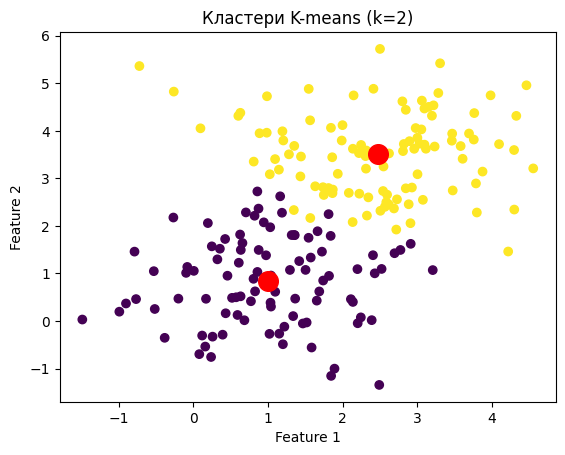

In [92]:
kmeans_data = KMeans(n_clusters=2, random_state=42)
kmeans_data.fit(df_data)

y_kmeans = kmeans_data.predict(df_data)


plt.scatter(df_data[1], df_data[2], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans_data.cluster_centers_[:, 1], kmeans_data.cluster_centers_[:, 2], s=200, c='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Кластери K-means (k=2)')

plt.show()

Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_pca = pca.fit_transform(df_mnist)

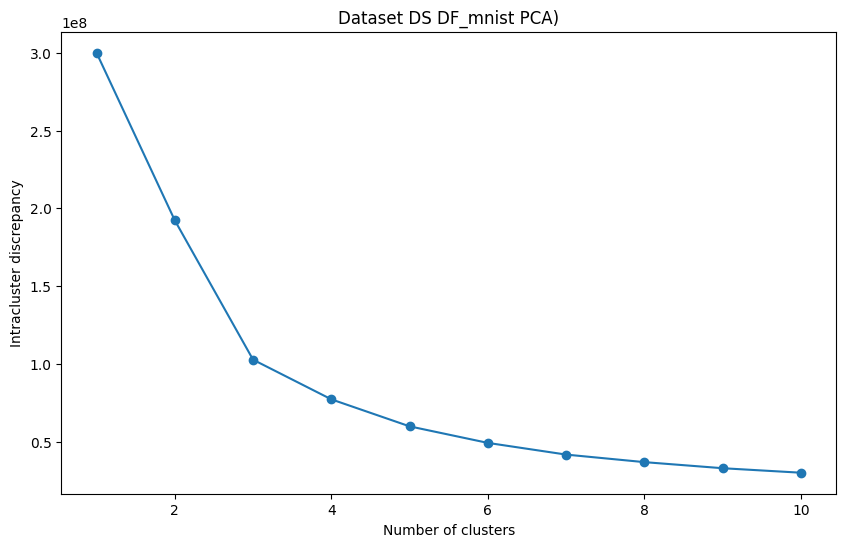

In [118]:
wcss_mnist2 = []
for i in range(1, 11):
    kmeans_mnist = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_mnist.fit(X_pca)
    wcss_mnist2.append(kmeans_mnist.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_mnist2, marker='o', linestyle='-')
plt.title('Dataset DS DF_mnist PCA)')
plt.xlabel('Number of clusters')
plt.ylabel('Intracluster discrepancy')
plt.show()

Після використання алгоритму PCA, оптимальна кількість кластерів - 3

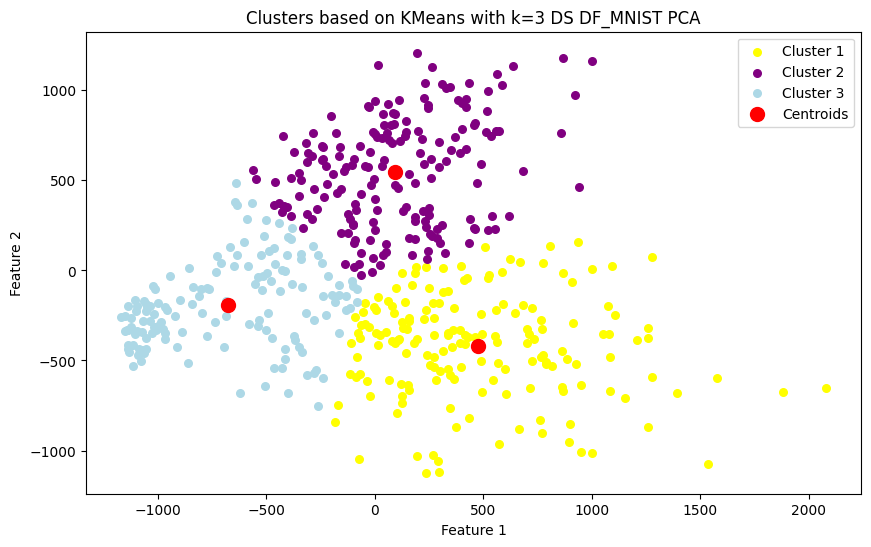

In [125]:
kmeans_mnist = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_mnist_optimal = kmeans_mnist.fit_predict(X_pca)

plt.figure(figsize=(10, 6))

cluster_colors = ['yellow', 'purple', 'lightblue']

for cluster_label in range(3):
    plt.scatter(X_pca[y_kmeans_mnist_optimal == cluster_label, 0],
                X_pca[y_kmeans_mnist_optimal == cluster_label, 1],
                s=30, label=f'Cluster {cluster_label + 1}', c=cluster_colors[cluster_label])

plt.scatter(kmeans_mnist.cluster_centers_[:, 0], kmeans_mnist.cluster_centers_[:, 1],
            s=100, c='r', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters based on KMeans with k=3 DS DF_MNIST PCA')
plt.legend()
plt.show()